# **multinomial random tree classifier for the whole model**

In [1]:
import pandas as pd 
import numpy as np 
import random
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn import datasets

#following a multinomial clasification tutorial 
#https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib

In [2]:
model_name = "model7"
tmp_file_path = "../../../"
model_desc = "_bloodEquiv"
onlyMuts=True
#load data 
all_data = pd.read_csv("{p}data/global/dataframes/{m}/global_all_data_readyForPrediction{d}.csv".format(p=tmp_file_path,m=model_name,d=model_desc))
all_data= all_data.drop(columns=['Unnamed: 0'])

if onlyMuts==True:
    all_data = all_data[all_data.mutation_status==1]
    all_data = all_data.drop(columns=["mutation_status"])
    model_desc=model_desc+"_onlyMuts"
else: model_desc=model_desc+"_mutsAndNon"
    
# 

In [3]:
#need to convert the dependant class into number representation
factor = pd.factorize(all_data['tissue'])
all_data.tissue = factor[0]
definitions = factor[1]

In [4]:
ncol = (all_data.shape[1])
X = all_data.iloc[:,0:ncol-1].values
y = all_data.iloc[:,ncol-1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [25]:
definitions

Index(['blood', 'germline', 'liver', 'skin'], dtype='object')

In [8]:
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(4),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

Predicted Tissue  blood  germline  liver  skin
Actual Tissue                                 
blood              1085        38     29    65
germline              8      1483     25     9
liver                28        65   1566    28
skin                 66        20     52  1437


In [12]:
# Making the Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual Tissue'], colnames=['Predicted Tissue'])

In [26]:
test1 = ["blood","germline","liver"]

In [38]:
sum(confusion_matrix.loc[["skin"]].values[0])

1575

In [53]:
confusion_matrix

Predicted Tissue,blood,germline,liver,skin
Actual Tissue,,,,
blood,1085,38,29,65
germline,8,1483,25,9
liver,28,65,1566,28
skin,66,20,52,1437


In [47]:
def get_sensitivity(df,tissue):
    """input a df, get out the sensitivity for the tissue of interest 
    note the row names have to be the actuall tissue and colnames = predicted tissue"""
    tissues = list(definitions) #the definitions already stores the tissues
    tissues.remove(tissue)
    P = sum(df.loc[[tissue]].values[0])
    TP = df.loc[[tissue]][[tissue]].values[0][0]
    return(TP/P)

In [73]:
def get_specificity(df,tissue):
    """input a df and a tissue, and you'll get the specificity: TN/N
    note the row names have to be the actuall tissue and colnames = predicted tissue"""
    tissues = list(definitions) #the definitions already stores the tissues
    tissues.remove(tissue)
    N=sum(df.loc[tissues].sum(axis=1))
    TN = sum(df.loc[tissues][tissues].sum(axis=1))
    return(TN/N)

In [ ]:
confusion_matrix.loc[[c]]

In [76]:
for tissue in list(definitions):
    print(tissue," specificity", round(get_specificity(confusion_matrix,tissue),3))

blood  specificity 0.979
germline  specificity 0.973
liver  specificity 0.975
skin  specificity 0.977


In [52]:
for tissue in list(definitions):
    print(tissue," sensitivity", round(get_sensitivity(confusion_matrix,tissue),3))

blood  sensitivity 0.892
germline  sensitivity 0.972
liver  sensitivity 0.928
skin  sensitivity 0.912


In [50]:
"skin sensitivity", round(get_sensitivity(confusion_matrix,"skin"),3)

('skin sensitivity', 0.912)

In [17]:
confusion_matrix.index

Index(['blood', 'germline', 'liver', 'skin'], dtype='object', name='Actual Tissue')

In [9]:
features = all_data.columns
importances= classifier.feature_importances_

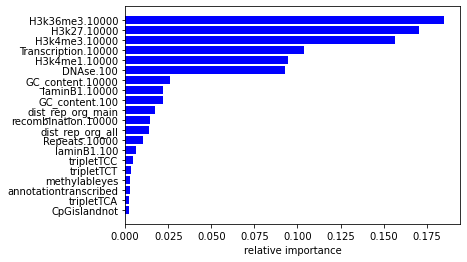

In [11]:
indices = np.argsort(importances)[-20:]
# plt.title("fueature importnace: {t}".format(t=tissue))
plt.barh(range(len(indices)),importances[indices],color='b',align="center")
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("relative importance")
plt.show()

# scratch 

In [ ]:
# blood_df = pd.read_csv("{p}data/blood/dataframes/{m}/blood_forLiver_all_data_readyForPrediction{d}.csv".format(p=tmp_file_path,m=model_name,d=model_desc))
# germline_df = pd.read_csv("{p}data/germline/dataframes/{m}/germline_forLiver_all_data_readyForPrediction{d}.csv".format(p=tmp_file_path,m=model_name,d=model_desc))
# skin_df = pd.read_csv("{p}data/skin/dataframes/{m}/skin_forLiver_all_data_readyForPrediction{d}.csv".format(p=tmp_file_path,m=model_name,d=model_desc))
# liver_df = pd.read_csv("{p}data/liver/dataframes/{m}/liver_all_data_readyForPrediction{d}.csv".format(p=tmp_file_path,m=model_name,d=model_desc))

# blood_df["tissue"]="blood"
# germline_df["tissue"]="germline"
# liver_df["tissue"]="liver"
# skin_df["tissue"]="skin"

# all_data = pd.concat([blood_df,germline_df])
# all_data = pd.concat([all_data, liver_df])
# all_data = pd.concat([all_data,skin_df])


In [2]:
# iris = datasets.load_iris()
# X = iris.data[:, 2:]
# y = iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# forest = RandomForestClassifier(criterion='gini',n_estimators=5,random_state=1,n_jobs=2)
# # Fit the model
# #
# forest.fit(X_train, y_train)
# # Measure model performance
# #
# y_pred = forest.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))